<img src=images/logo.png align='right' width=200>

# Time Based Features

## Goal

Our next step is to get introduced to a real time series dataset and learn some fundamental analysis techniques.

In this notebook we shall focus on creating time-based features.

## Program

- [Time Based Features](#tb)
- [Assignment]()
- [Summary](#sum)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

<a id='read'></a>

## Reading in Time Series Data
Again, we will use the *household power consumption* dataset. It comes from [UCI ML repo](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption) and contains detailed power consumption time series data of a single household in Paris between 2006 and 2010.
![](images/power.jpeg)

Let's load the data in again, taking care to parse the time information and set it as the index.

In [2]:
power = pd.read_csv('data/household_power_consumption.csv', 
                    parse_dates=['ts'], 
                    index_col='ts')
power.head()

,consumption
ts,
2006-12-16 17:24:00,52.266667
2006-12-16 17:25:00,72.333333
2006-12-16 17:26:00,70.566667
2006-12-16 17:27:00,71.800000
2006-12-16 17:28:00,43.100000


<a id='tb'></a>
## Time Based Features

Let's create a daily data frame (precision in minutes can be a little too much granularity)

In [3]:
power_daily = power.resample('D').sum()
power_daily

,consumption
ts,
2006-12-16,14680.933333
2006-12-17,36946.666667
2006-12-18,19028.433333
2006-12-19,13131.900000
2006-12-20,20384.800000
...,...
2010-11-22,16924.600000
2010-11-23,16352.266667
2010-11-24,13769.466667


We can add time based features to our data.

In the example we choose to extract the day of the week and the quarter. Feel free to explore [other](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-dt) properties and methods.

In [6]:
(
    power_daily
    .assign(weekday = power_daily.index.day_name())
    .assign(quarter = power_daily.index.quarter)
    .loc[lambda df: df['weekday']=='Monday']
).head()

,consumption,weekday,quarter
ts,,,
2006-12-18,19028.433333,Monday,4
2006-12-25,31341.666667,Monday,4
2007-01-01,39584.733333,Monday,1
2007-01-08,19342.000000,Monday,1
2007-01-15,17310.300000,Monday,1


The time based features can help with our analysis.

In the example below we add year and day of year features to our data. This helps us to track the daily consumption across the different years.

In [7]:
power_monthly = (
    power.resample('M').sum()
    .assign(year = lambda df: df.index.year)
    .assign(month = lambda df: df.index.month)
    .assign(month_name = lambda df: df.index.month_name())
)
power_monthly.head()

,consumption,year,month,month_name
ts,,,,
2006-12-31,457765.033333,2006,12,December
2007-01-31,684912.700000,2007,1,January
2007-02-28,559019.433333,2007,2,February
2007-03-31,525144.533333,2007,3,March
2007-04-30,316359.766667,2007,4,April


<AxesSubplot:xlabel='month', ylabel='consumption'>

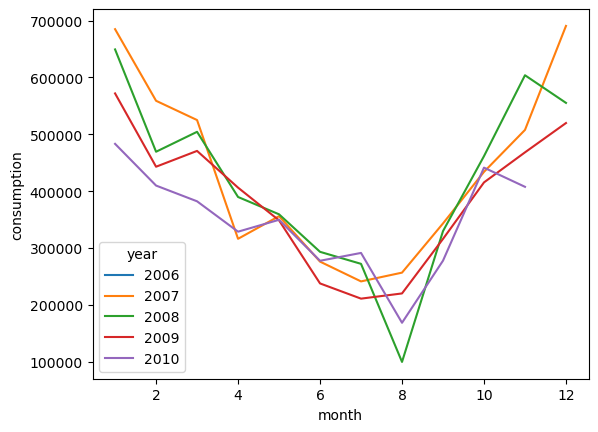

In [8]:
import seaborn as sns

sns.lineplot(data=power_monthly, 
             x='month', 
             y='consumption', 
             hue=power_monthly['year'].astype(str))

In [ ]:
conda install altair

In [ ]:
!pip install altair

In [9]:
import altair as alt

alt.Chart(power_monthly).mark_line().encode(
    x='month',
    y='consumption',
    color='year:N',
    tooltip = ['consumption', 'month_name']
).interactive()

/Users/jameshayward/anaconda3/envs/time/lib/python3.9/site-packages/altair/utils/core.py:283: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

<a id='as2'></a>
## Assignment: Weekday with most consumption

Which day of the week has the highest consumption on average? Does consumption drop in the weekend? 

Bonus: make a bar plot to better illustrate weekly consumption patterns

*you can load the answer below:*

<AxesSubplot:title={'center':'total consumption per day of the week'}, xlabel='weekday'>

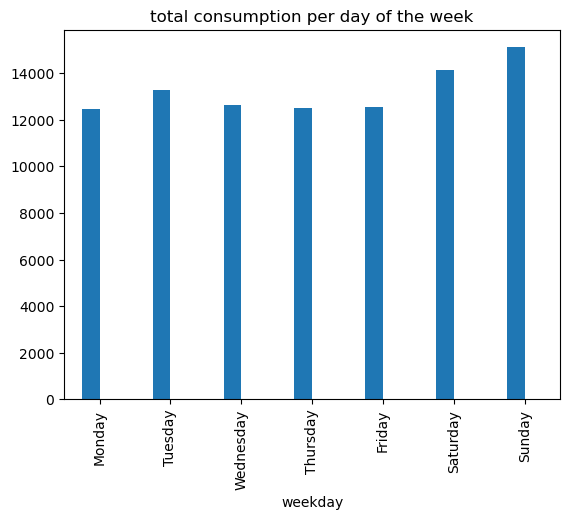

In [20]:
# %load answers/power-weekday-most-consumption.py
(
    power_daily
    .assign(weekday = lambda df: df.index.day_name(),
            weekday_num = lambda df: df.index.day_of_week
           )
    .groupby('weekday')
    .mean()
    .sort_values('weekday_num')
      .plot(kind='bar', legend=False, title='total consumption per day of the week')
)


<a id='sum'></a>
## Summary

We have covered: 
- How to properly read in time series data in Pandas, and why it is important to set the date as an index
- How to aggregate over time periods with Pandas
- How to create time based features to aid with analysis
